In [2]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [33]:
url = "output.csv"
data = pd.read_csv(url, sep=",")

pd.options.display.max_columns = 2402

data_length = len( data.iloc[:,0] )
print( " the data length : ",data_length )

 the data length :  59592


In [34]:
data.head()

MC_true_zvtx  fit_reco_z  nclu_inner  nclu_outer    hist_0  hist_1  hist_2  \
0      -169.669    -169.515        1362        1231  0.001442     0.0     0.0   
1      -246.398    -245.469         573         523  0.000000     0.0     0.0   
2      -150.292    -150.660         370         313  0.000000     0.0     0.0   
3      -214.203    -213.313          47          37  0.000000     0.0     0.0   
4      -214.567    -216.220         424         418  0.000000     0.0     0.0   

   hist_3  hist_4  hist_5  hist_6  hist_7  hist_8  hist_9  hist_10  hist_11  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0   

   hist_12  hist_13  hist_14  hist_15  hist_16  hist_17  hist_18  hist_19  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hist_20  hist_21  hist_22  hist_23  hist_24  hist_25  hist_26  hist_27  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hist_28  hist_29  hist_30  hist_31  hist_32  hist_33  hist_34  hist_35  \
0      0.0      0.0        0        0        0        0        0        0   
1      0.0      0.0        0        0        0        0        0        0   
2      0.0      0.0        0        0        0        0        0        0   
3      0.0      0.0        0        0        0        0        0        0   
4      0.0      0.0        0        0        0        0        0        0   

   hist_36  hist_37  hist_38  hist_39  hist_40  hist_41  hist_42  hist_43  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_44  hist_45  hist_46  hist_47  hist_48  hist_49  hist_50  hist_51  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_52  hist_53  hist_54  hist_55  hist_56  hist_57  hist_58  hist_59  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_60  hist_61  hist_62  hist_63  hist_64  hist_65  hist_66  hist_67  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0    

In [35]:
X = data.drop(['MC_true_zvtx','fit_reco_z','nclu_inner', 'nclu_outer'], axis=1)

y = data['MC_true_zvtx']
nclu_inner = data['nclu_inner']
nclu_outer = data['nclu_outer']
fit_reco_z = data['fit_reco_z']

X.head()

hist_0  hist_1  hist_2  hist_3  hist_4  hist_5  hist_6  hist_7  hist_8  \
0  0.001442     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1  0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3  0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   hist_9  hist_10  hist_11  hist_12  hist_13  hist_14  hist_15  hist_16  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hist_17  hist_18  hist_19  hist_20  hist_21  hist_22  hist_23  hist_24  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   hist_25  hist_26  hist_27  hist_28  hist_29  hist_30  hist_31  hist_32  \
0      0.0      0.0      0.0      0.0      0.0        0        0        0   
1      0.0      0.0      0.0      0.0      0.0        0        0        0   
2      0.0      0.0      0.0      0.0      0.0        0        0        0   
3      0.0      0.0      0.0      0.0      0.0        0        0        0   
4      0.0      0.0      0.0      0.0      0.0        0        0        0   

   hist_33  hist_34  hist_35  hist_36  hist_37  hist_38  hist_39  hist_40  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_41  hist_42  hist_43  hist_44  hist_45  hist_46  hist_47  hist_48  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_49  hist_50  hist_51  hist_52  hist_53  hist_54  hist_55  hist_56  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_57  hist_58  hist_59  hist_60  hist_61  hist_62  hist_63  hist_64  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hist_65  hist_66  hist_67  hist_68  hist_69  hist_70  hist_71  hist_72  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0

In [36]:
y.head()

0   -169.669
1   -246.398
2   -150.292
3   -214.203
4   -214.567
Name: MC_true_zvtx, dtype: float64

In [37]:
nclu_inner.head()

0    1362
1     573
2     370
3      47
4     424
Name: nclu_inner, dtype: int64

In [38]:
nclu_outer.head()

0    1231
1     523
2     313
3      37
4     418
Name: nclu_outer, dtype: int64

In [39]:
X_train, X_test, y_train, y_test, nclu_inner_train, nclu_inner_test, nclu_outer_train, nclu_outer_test, fit_reco_z_train, fit_reco_z_test  = train_test_split(X, y, nclu_inner, nclu_outer, fit_reco_z, test_size=0.2, random_state=123)

In [40]:
X_train.head()

hist_0    hist_1    hist_2    hist_3    hist_4    hist_5    hist_6  \
14883  0.095590  0.039175  0.012470  0.000000  0.000000  0.000000  0.000000   
38687  0.817305  0.604008  0.521924  0.440227  0.361594  0.289513  0.219321   
13598  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33920  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
43342  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         hist_7   hist_8    hist_9  hist_10  hist_11  hist_12  hist_13  \
14883  0.000000  0.00000  0.000000      0.0      0.0      0.0      0.0   
38687  0.152203  0.08531  0.018405      0.0      0.0      0.0      0.0   
13598  0.000000  0.00000  0.000000      0.0      0.0      0.0      0.0   
33920  0.000000  0.00000  0.000000      0.0      0.0      0.0      0.0   
43342  0.000000  0.00000  0.000000      0.0      0.0      0.0      0.0   

       hist_14  hist_15  hist_16  hist_17  hist_18  hist_19  hist_20  hist_21  \
14883      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
38687      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
13598      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
33920      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
43342      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       hist_22  hist_23  hist_24  hist_25  hist_26  hist_27  hist_28  hist_29  \
14883      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
38687      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
13598      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
33920      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
43342      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       hist_30  hist_31  hist_32  hist_33  hist_34  hist_35  hist_36  hist_37  \
14883        0        0        0        0        0        0        0        0   
38687        0        0        0        0        0        0        0        0   
13598        0        0        0        0        0        0        0        0   
33920        0        0        0        0        0        0        0        0   
43342        0        0        0        0        0        0        0        0   

       hist_38  hist_39  hist_40  hist_41  hist_42  hist_43  hist_44  hist_45  \
14883        0        0        0        0        0        0        0        0   
38687        0        0        0        0        0        0        0        0   
13598        0        0        0        0        0        0        0        0   
33920        0        0        0        0        0        0        0        0   
43342        0        0        0        0        0        0        0        0   

       hist_46  hist_47  hist_48  hist_49  hist_50  hist_51  hist_52  hist_53  \
14883        0        0        0        0        0        0        0        0   
38687        0        0        0        0        0        0        0        0   
13598        0        0        0        0        0        0        0        0   
33920        0        0        0        0        0        0        0        0   
43342        0        0        0        0        0        0        0        0   

       hist_54  hist_55  hist_56  hist_57  hist_58  hist_59  hist_60  hist_61  \
14883        0        0        0        0        0        0        0        0   
38687        0        0        0        0        0        0        0        0   
13598        0        0        0        0        0        0        0        0   
33920        0        0        0        0        0        0        0        0   
43342        0        0        0        0        0        0        0        0   

       hist_62  hist_63  hist_64  hist_65  hist_66  hist_67  hist_68  hist_69  \
14883        0        0        0        0        0        0        0        0   
38687

In [12]:
nclu_inner_train.head()

14883     843
38687    1775
13598     169
33920     357
43342     437
Name: nclu_inner, dtype: int64

In [13]:
nclu_outer_train.head()

14883     768
38687    1608
13598     139
33920     325
43342     372
Name: nclu_outer, dtype: int64

In [41]:
print("X_train: ", len( X_train.iloc[:,0] ), "X_test: ", len( X_test.iloc[:,0] ))

X_train:  47673 X_test:  11919


In [42]:
model = XGBRegressor(objective='reg:squarederror', random_state=123)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=48,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
predictions = model.predict(X_test)

In [18]:
type(predictions)

numpy.ndarray

In [19]:
type(y_test)

pandas.core.series.Series

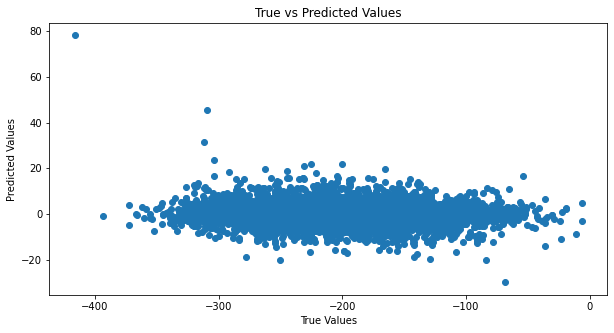

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions - y_test)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [46]:
import ROOT
import numpy as np

file_out = ROOT.TFile("test_out.root","RECREATE")
tree_out = ROOT.TTree("tree","zvtx by ML training")

out_predict_z = np.zeros(1, dtype=float) 
out_MC_true_z = np.zeros(1, dtype=float)    
out_fit_reco_z = np.zeros(1, dtype=float)
out_nclu_inner = np.zeros(1, dtype=int)
out_nclu_outer = np.zeros(1, dtype=int)


# Create branches in the TTree
tree_out.Branch("predict_z", out_predict_z, "predict_z/D")
tree_out.Branch("MC_true_z", out_MC_true_z, "MC_true_z/D")
tree_out.Branch("fit_reco_z", out_fit_reco_z, "fit_reco_z/D")
tree_out.Branch("nclu_inner", out_nclu_inner, "nclu_inner/I")
tree_out.Branch("nclu_outer", out_nclu_outer, "nclu_outer/I")


# h = ROOT.TH2F("hist_2D", "hist_2D", 200, -500, 100,200,-30,30)

print(len(predictions), len(y_test), len(fit_reco_z_test), len(nclu_inner_test), len(nclu_outer_test))

for i in range (len(predictions)):
    out_predict_z[0] = predictions[i]
    out_MC_true_z[0] = y_test.iloc[i]
    out_fit_reco_z[0] = fit_reco_z_test.iloc[i]
    out_nclu_inner[0] = nclu_inner_test.iloc[i]
    out_nclu_outer[0] = nclu_outer_test.iloc[i]
    tree_out.Fill()
    
file_out.Write()
file_out.Close()

11919 11919 11919 11919 11919
